<div style="background-color: #B7A6C9; padding:20px; border-radius:10px">
  <h1 style="color:#000000; text-align:center;">🚥 Predicting Road Accident Risk 🚥 </h1>
</div>

# 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 2. Loading Data

In [2]:
train_df=pd.read_csv("/kaggle/input/playground-series-s5e10/train.csv")
test_df=pd.read_csv("/kaggle/input/playground-series-s5e10/test.csv")

In [3]:
train_df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [4]:
test_df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


# 3. Initial Data Exploration

In [5]:
#Show informations about the training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [6]:
#Display the statistical summary of the training dataset
train_df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849974,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [7]:
#Show informations about the training dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      172585 non-null  int64  
 1   road_type               172585 non-null  object 
 2   num_lanes               172585 non-null  int64  
 3   curvature               172585 non-null  float64
 4   speed_limit             172585 non-null  int64  
 5   lighting                172585 non-null  object 
 6   weather                 172585 non-null  object 
 7   road_signs_present      172585 non-null  bool   
 8   public_road             172585 non-null  bool   
 9   time_of_day             172585 non-null  object 
 10  holiday                 172585 non-null  bool   
 11  school_season           172585 non-null  bool   
 12  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


In [8]:
#Display the statistical summary of the training dataset
test_df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents
count,172585.000000,172585.000000,172585.000000,172585.000000,172585.000000
mean,604046.000000,2.494046,0.487263,46.102761,1.186059
std,49821.142441,1.119148,0.272343,15.787077,0.897161
min,517754.000000,1.000000,0.000000,25.000000,0.000000
25%,560900.000000,1.000000,0.260000,35.000000,1.000000
50%,604046.000000,2.000000,0.510000,45.000000,1.000000
75%,647192.000000,3.000000,0.710000,60.000000,2.000000
max,690338.000000,4.000000,1.000000,70.000000,7.000000


# 4. Checking Data Quality

In [9]:
#Checking for missing values in the training dataset
train_df.isna().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [10]:
#Checking for missing values in the training datset
test_df.isna().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
dtype: int64

In [11]:
# Checking for duplicates in the training dataset
print("The number of duplicated observations in the train dataset is equal to", train_df.duplicated().sum())

# Checking for duplicates in the testing dataset
print("The number of duplicated observations in the test dataset is equal to", test_df.duplicated().sum())

The number of duplicated observations in the train dataset is equal to 0
The number of duplicated observations in the test dataset is equal to 0


# 5. Exploratory Data Analysis

In [12]:
df=train_df.drop(columns=["id"])

In [13]:
df.nunique().sort_values()

road_signs_present          2
public_road                 2
holiday                     2
school_season               2
road_type                   3
lighting                    3
weather                     3
time_of_day                 3
num_lanes                   4
speed_limit                 5
num_reported_accidents      8
accident_risk              98
curvature                 261
dtype: int64

In [14]:
df["road_signs_present"].value_counts() #categorical value

road_signs_present
False    259289
True     258465
Name: count, dtype: int64

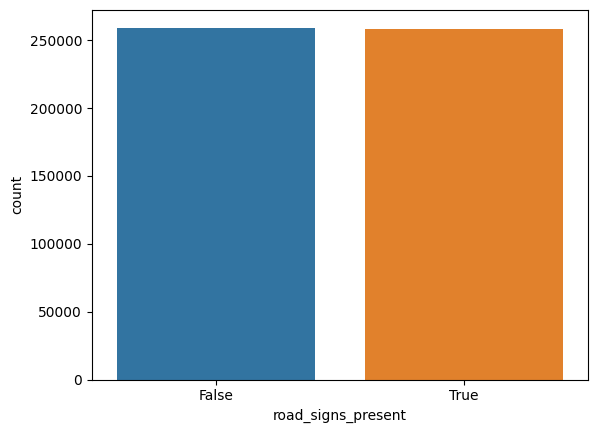

In [15]:
sns.countplot(data=df, x="road_signs_present")
plt.show()

In [16]:
df["public_road"].value_counts() #categorical value

public_road
True     260045
False    257709
Name: count, dtype: int64

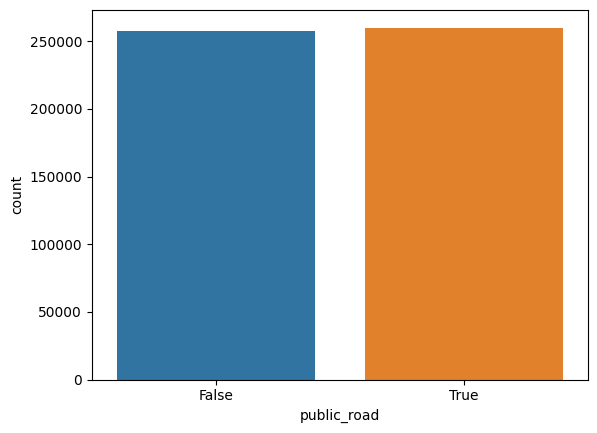

In [17]:
sns.countplot(data=df, x="public_road")
plt.show()

In [18]:
df["holiday"].value_counts() #categorical value

holiday
True     260688
False    257066
Name: count, dtype: int64

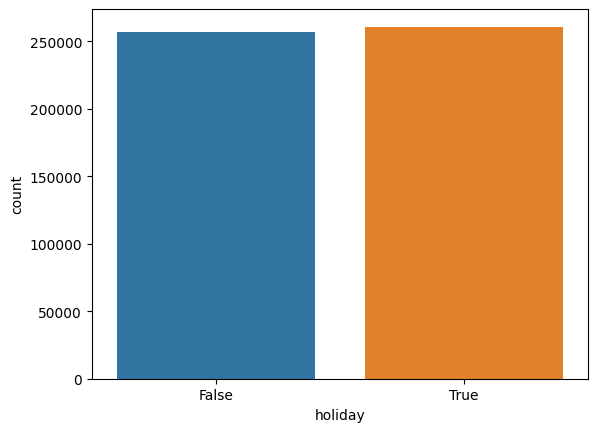

In [19]:
sns.countplot(data=df, x="holiday")
plt.show()

In [20]:
df["road_type"].value_counts() #categorical value

road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64

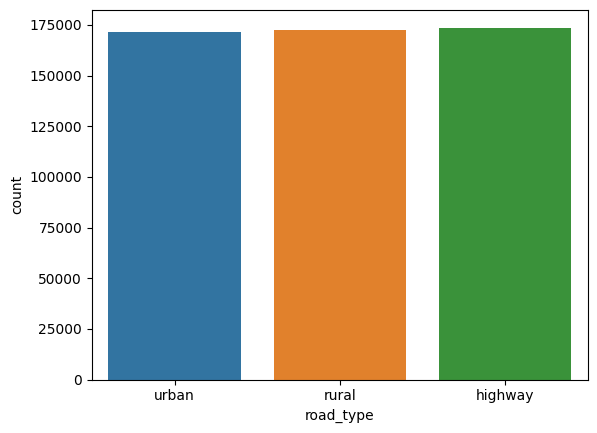

In [21]:
sns.countplot(data=df, x="road_type")
plt.show()

In [22]:
df["lighting"].value_counts() #categorical value

lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64

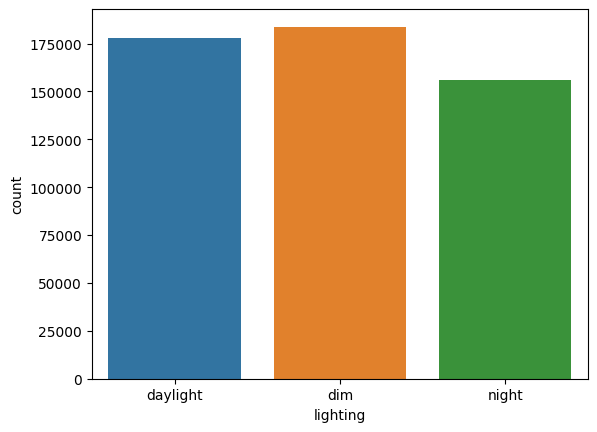

In [23]:
sns.countplot(data=df, x="lighting")
plt.show()

In [24]:
df["weather"].value_counts() #categorical value

weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64

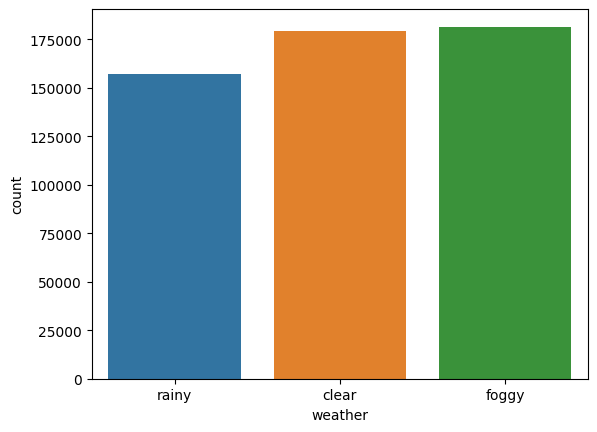

In [25]:
sns.countplot(data=df, x="weather")
plt.show()

In [26]:
df["time_of_day"].value_counts() #categorical value

time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64

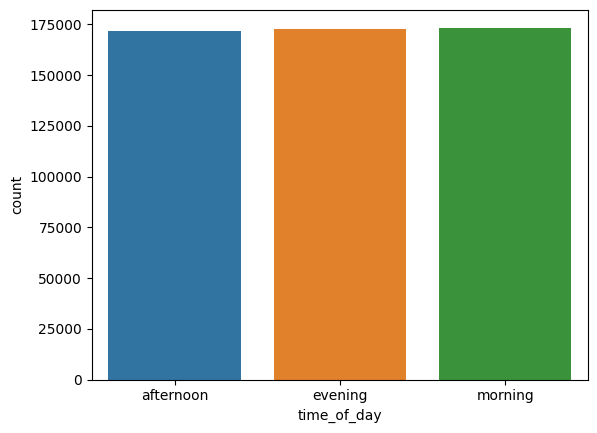

In [27]:
sns.countplot(data=df, x="time_of_day")
plt.show()

In [28]:
df["num_lanes"].value_counts() #categorical value

num_lanes
1    131168
2    130054
4    129118
3    127414
Name: count, dtype: int64

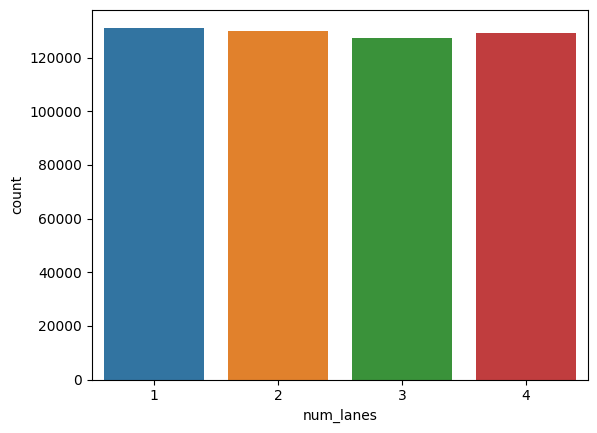

In [29]:
sns.countplot(data=df, x="num_lanes")
plt.show()

In [30]:
df["speed_limit"].value_counts() #categorical value

speed_limit
45    115752
35    111628
25    101422
60    100304
70     88648
Name: count, dtype: int64

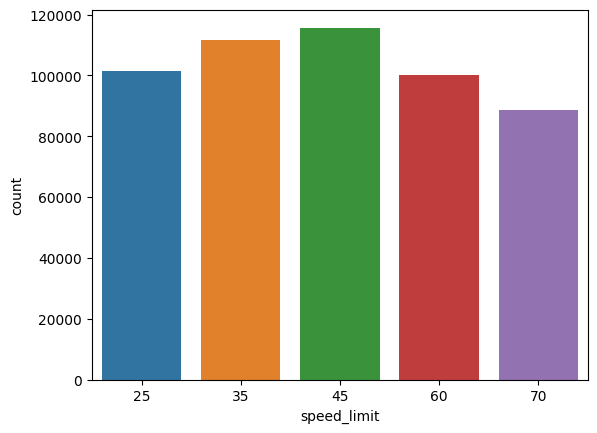

In [31]:
sns.countplot(data=df, x="speed_limit")
plt.show()

In [32]:
df["num_reported_accidents"].value_counts() #numerical value

num_reported_accidents
1    209674
2    145965
0    125269
3     34197
4      2392
5       231
6        24
7         2
Name: count, dtype: int64

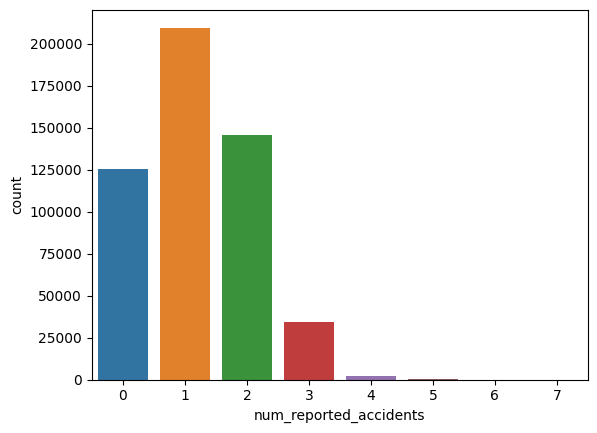

In [33]:
sns.countplot(data=df, x="num_reported_accidents")
plt.show()

The number of

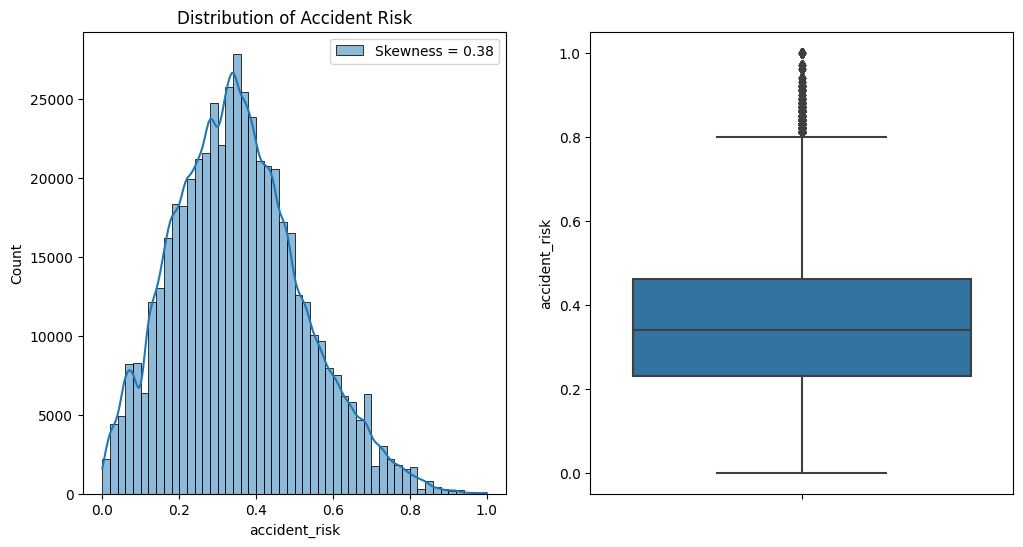

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data=df, x="accident_risk", bins=50, kde=True, label=f"Skewness = {df['accident_risk'].skew():.2f}") #A little of right skewness (skewness=0.38)
plt.title("Distribution of Accident Risk")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=df, y="accident_risk")
plt.show()

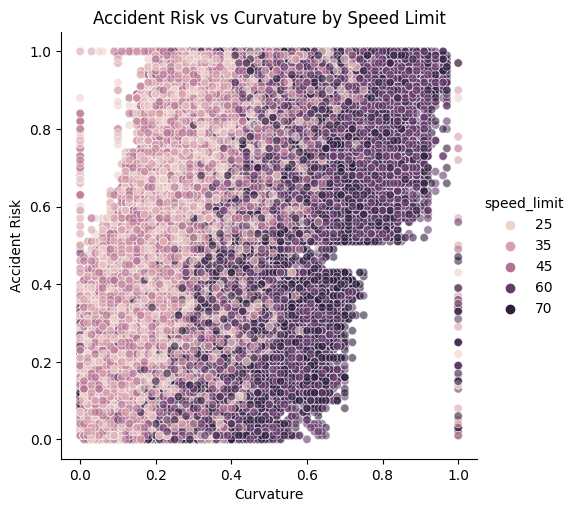

In [35]:
sns.relplot(data=df, x="accident_risk",y ="curvature", hue='speed_limit',alpha=0.6)
plt.xlabel("Curvature")
plt.ylabel("Accident Risk")
plt.title("Accident Risk vs Curvature by Speed Limit")
plt.show()

In [36]:
df["road_type"]

0           urban
1           urban
2           rural
3         highway
4           rural
           ...   
517749    highway
517750      rural
517751      urban
517752    highway
517753    highway
Name: road_type, Length: 517754, dtype: object

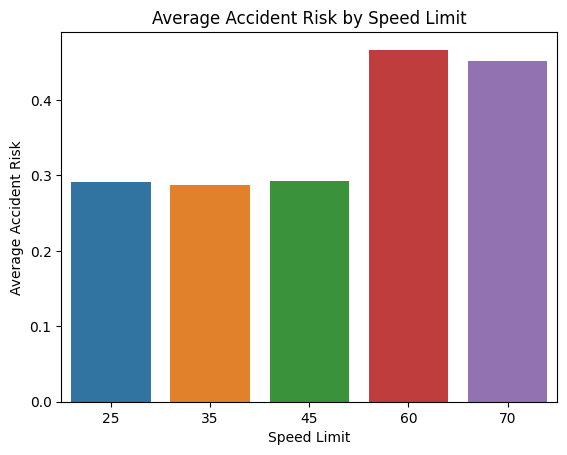

In [37]:
sns.barplot(x='speed_limit', y='accident_risk', data=df, estimator='mean', ci=None)
plt.xlabel("Speed Limit")
plt.ylabel("Average Accident Risk")
plt.title("Average Accident Risk by Speed Limit")
plt.show()

#### According to the scatter plot there's a **moderate poitive correlation** between the road curvature and the accident risk: **the curvier the road is the higher the chances of an accident happening.**
#### The gradient colors in the scatter plot refering to the speed limits hows that higher speed limits are associated withc higher accident risks. This relationship is further confirmed by the bar plot, which shows that the average probability of a road accident rises from 28% to 48% when the speed limit increases from 45 to 60: **the higher the road's speed limit the higher the accident risk.**

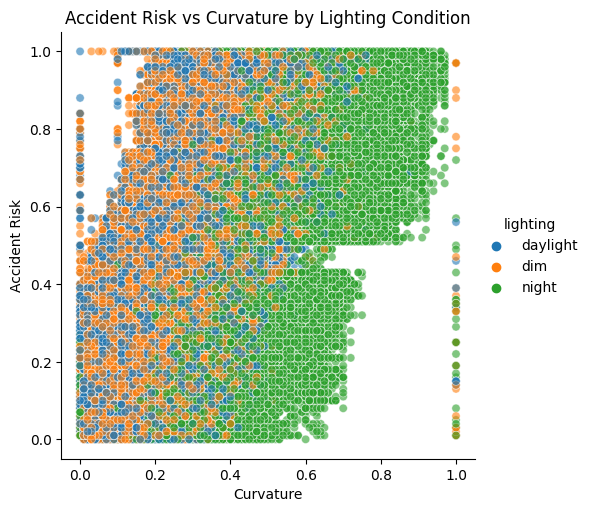

In [38]:
sns.relplot(data=df, x="accident_risk",y ="curvature", hue='lighting',alpha=0.6)
plt.xlabel("Curvature")
plt.ylabel("Accident Risk")
plt.title("Accident Risk vs Curvature by Lighting Condition")
plt.show()

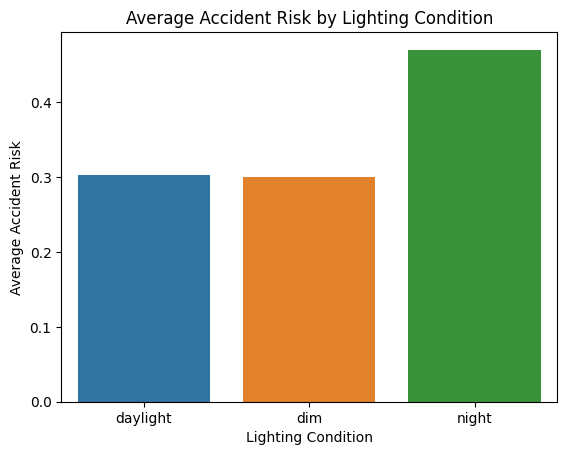

In [39]:
sns.barplot(x='lighting', y='accident_risk', data=df, estimator='mean', ci=None)
plt.xlabel("Lighting Condition")
plt.ylabel("Average Accident Risk")
plt.title("Average Accident Risk by Lighting Condition")
plt.show()

### The likelihood of a road accident is influenced by lighting conditions. While daylight or dim light conditions are associated with an accident risk of around 30%, nighttime lighting conditions are linked to higher accident risks.

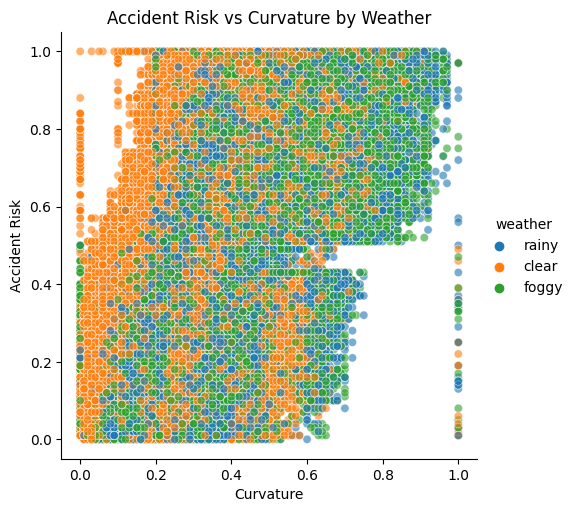

In [40]:
sns.relplot(data=df, x="accident_risk",y ="curvature", hue='weather',alpha=0.6)
plt.xlabel("Curvature")
plt.ylabel("Accident Risk")
plt.title("Accident Risk vs Curvature by Weather")
plt.show()

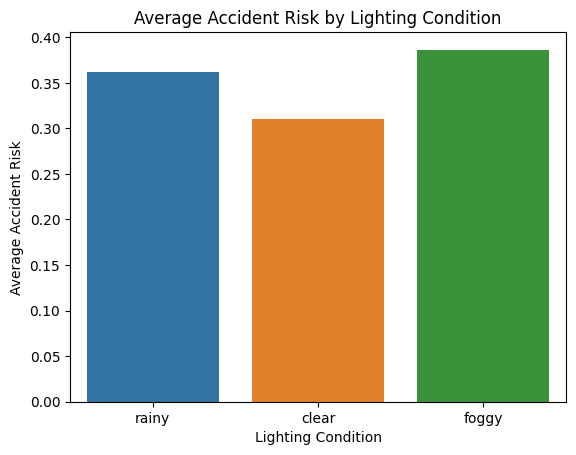

In [41]:
sns.barplot(x='weather', y='accident_risk', data=df, estimator='mean', ci=None)
plt.xlabel("Lighting Condition")
plt.ylabel("Average Accident Risk")
plt.title("Average Accident Risk by Lighting Condition")
plt.show()

### In the scatter plot the observation referring to a clear weather dominate the left side which translate to lower accidents risk likely due to better visibility and more predictable road conditions.

In [42]:
df["speed_limit"].dtypes

dtype('int64')

In [43]:
df.select_dtypes("float")

,curvature,accident_risk
0,0.06,0.13
1,0.99,0.35
2,0.63,0.30
3,0.07,0.21
4,0.58,0.56
...,...,...
517749,0.10,0.32
517750,0.47,0.26
517751,0.62,0.19
517752,0.63,0.51


# 6. Data Preprocessing

In [44]:
num_cols=list(df.select_dtypes(include="number").columns)
print(num_cols)
cat_cols=list(df.select_dtypes(include="object").columns)
print(cat_cols)

['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents', 'accident_risk']
['road_type', 'lighting', 'weather', 'time_of_day']


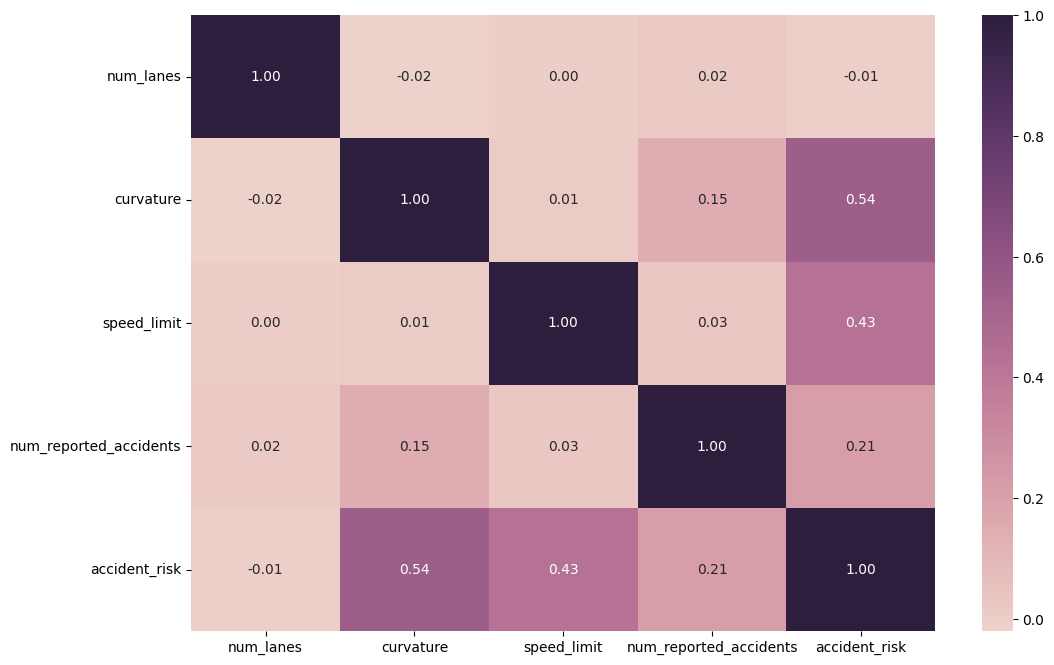

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt=".2f", cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

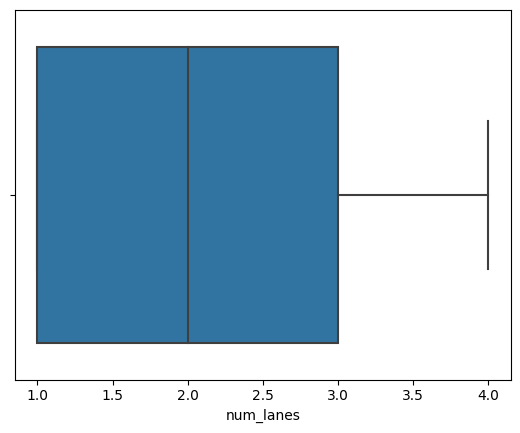

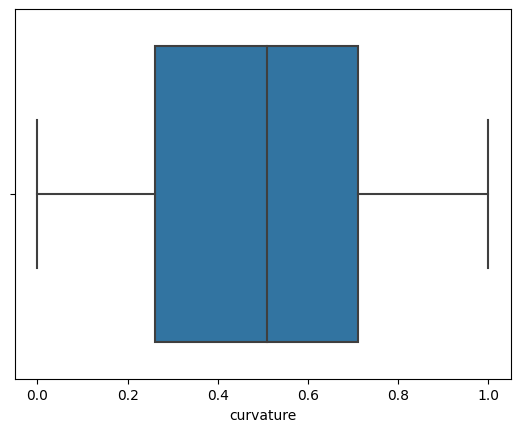

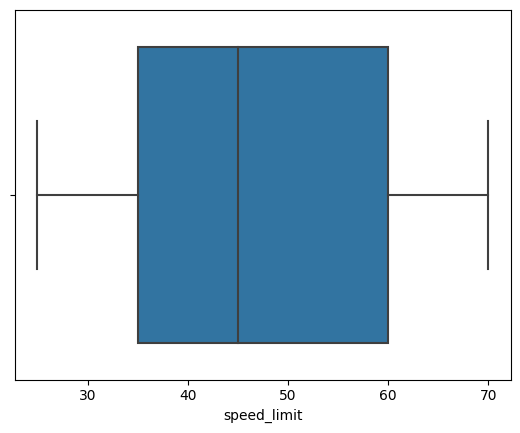

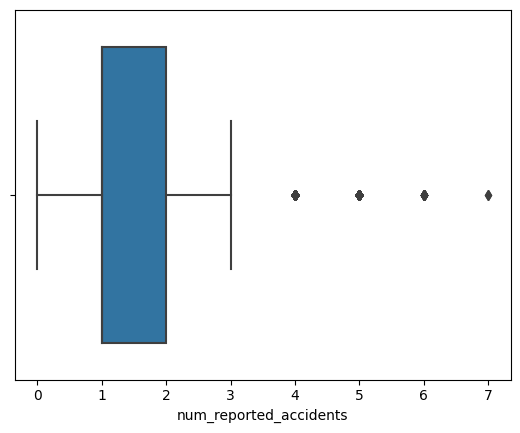

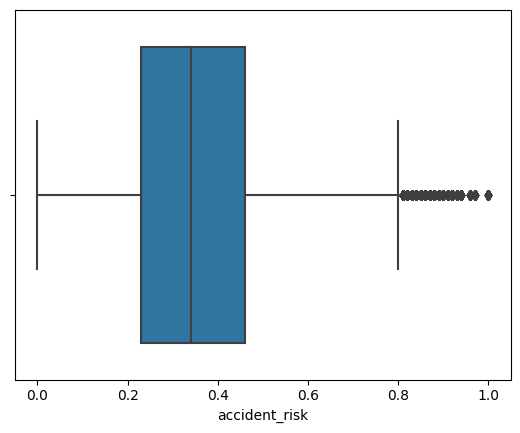

In [46]:
for col in num_cols:
    sns.boxplot(data=df, x=col)
    plt.show()

# 7. Modeling 

# 8. Hyperparameters Tuning & Optimisation

# 9. Submitting Predictions